<a href="https://colab.research.google.com/github/Park-da-in/ComputerVision_Seminar/blob/main/week4_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CV_seminar_project

/content/drive/MyDrive/CV_seminar_project


In [ ]:
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더
import os
import glob

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed_all(42)

In [ ]:
device

'cuda'

In [ ]:
root_path = '/content/drive/MyDrive/CV_seminar_project'
train_path = '/content/drive/MyDrive/CV_seminar_project/train'
test_path = '/content/drive/MyDrive/CV_seminar_project/test'

dolphin_dir = '/dolphin/'
shark_dir = '/shark/'
whale_dir = '/whale/'

In [ ]:
resize_trans = transforms.Compose([
                                   transforms.Resize((128,128)),
                                   transforms.ToTensor()
])

resize_train = torchvision.datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = torchvision.datasets.ImageFolder(root=test_path, transform=resize_trans)

In [ ]:
resize_train[0][0].shape

torch.Size([3, 128, 128])

In [ ]:
resize_train[0][0]

tensor([[[0.1804, 0.1882, 0.1882,  ..., 0.3020, 0.3020, 0.3059],
         [0.1647, 0.1843, 0.1922,  ..., 0.2980, 0.2980, 0.3020],
         [0.1294, 0.1412, 0.1804,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.1059, 0.0980, 0.0941,  ..., 0.0941, 0.0902, 0.0706],
         [0.0824, 0.0863, 0.0941,  ..., 0.0863, 0.0667, 0.0863],
         [0.0863, 0.0863, 0.0863,  ..., 0.0745, 0.0706, 0.0980]],

        [[0.3647, 0.3725, 0.3725,  ..., 0.5294, 0.5255, 0.5216],
         [0.3490, 0.3686, 0.3765,  ..., 0.5255, 0.5216, 0.5176],
         [0.3137, 0.3255, 0.3647,  ..., 0.5216, 0.5176, 0.5137],
         ...,
         [0.1922, 0.1882, 0.1843,  ..., 0.1294, 0.1373, 0.1294],
         [0.1647, 0.1686, 0.1804,  ..., 0.1255, 0.1137, 0.1529],
         [0.1529, 0.1529, 0.1647,  ..., 0.1216, 0.1333, 0.1843]],

        [[0.8196, 0.8275, 0.8275,  ..., 0.9137, 0.9137, 0.9176],
         [0.8039, 0.8235, 0.8314,  ..., 0.9137, 0.9098, 0.9137],
         [0.7686, 0.7804, 0.8196,  ..., 0.9098, 0.9059, 0.

In [ ]:
import numpy as np
np.mean(resize_train[0][0].numpy(),axis=(1,2))

array([0.16920143, 0.31231284, 0.6763141 ], dtype=float32)

In [ ]:
def get_mean_std(dataset):
  meanRGB = [np.mean( image.numpy(), axis=(1,2)) for image, _ in dataset]
  stdRGB = [np.std( image.numpy(), axis=(1,2)) for image, _ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.std([s[0] for s in stdRGB])
  stdG = np.std([s[1] for s in stdRGB])
  stdB = np.std([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)

In [ ]:
resize_train_mean=[0.17191947, 0.41128376, 0.56153077]
resize_train_std=[0.16150557, 0.16577946, 0.16063999]

resize_test_mean=[0.15918699, 0.410329, 0.55247366]
resize_test_std=[0.1542138, 0.16098696, 0.15552239]

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.RandomCrop(124), 
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), 
    transforms.RandomHorizontalFlip(p = 1),
    transforms.RandomVerticalFlip(p = 1), 
    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_test = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transform_train)
testset = torchvision.datasets.ImageFolder(root=test_path, transform=transform_test)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=0)

test_loader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=0)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

def imshow(img, mean, std):
    npimg = img.numpy()
    img = np.transpose( npimg, (1, 2, 0) )
    img = img * std + mean # renormalize
    img = img.clip(0, 1)
    plt.imshow(img)
    plt.show()


none_trans = torchvision.datasets.ImageFolder(root=train_path, transform=None)

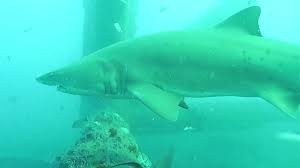

In [ ]:
# 원본 이미지
none_trans[359][0]

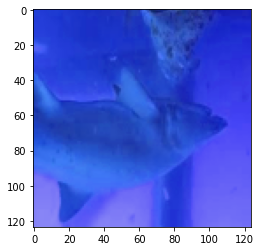

In [ ]:
# augmentation을 적용한 shark 이미지
imshow((trainset[359][0]),resize_train_mean,resize_train_std)